In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:14<00:00, 78.3MB/s]


In [10]:
train="/content/dogs-vs-cats/train"
test="/content/dogs-vs-cats/test"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout


In [5]:
train_data=keras.utils.image_dataset_from_directory(
    directory=train,
    labels="inferred",     # folder name cats, dogs
    label_mode="int",      # 0,1
    batch_size=32,
    image_size=(256,256)   # resize
)

test_data=keras.utils.image_dataset_from_directory(
    directory=test,
    labels="inferred",     # folder name cats, dogs
    label_mode="int",      # 0,1
    batch_size=32,
    image_size=(256,256)   # resize
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# normaliztion
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

train_data=train_data.map(process)
test_data=test_data.map(process)

In [7]:
# create model
model=Sequential() #layer by layer

# 1st processing
#conv2d : extract feature line edge pattern
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
# maxpooling2d
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

# 2nd
#conv2d : extract feature line edge pattern
model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
# maxpooling2d
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

# 3rd
#conv2d : extract feature line edge pattern
model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
# maxpooling2d
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

# convert 2d to 1d
model.add(Flatten())

# dense layer with dropout
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history=model.fit(train_data, epochs=3, validation_data=test_data)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 3189s 5s/step - accuracy: 0.7191 - loss: 0.5495 - val_accuracy: 0.7860 - val_loss: 0.4665
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 3165s 5s/step - accuracy: 0.7998 - loss: 0.4252 - val_accuracy: 0.7868 - val_loss: 0.4598
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 3126s 5s/step - accuracy: 0.8733 - loss: 0.2959 - val_accuracy: 0.8078 - val_loss: 0.4748


In [11]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

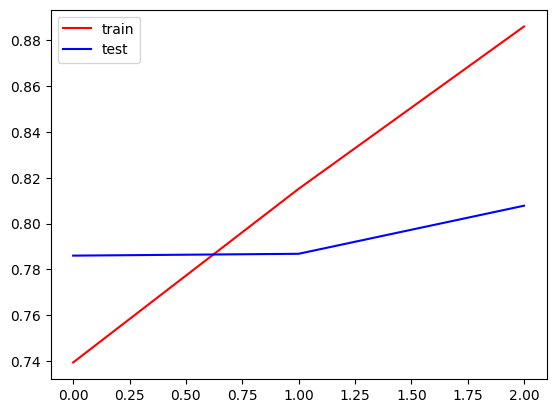

In [12]:
# plot the accuracy train-test
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="test")
plt.legend()
plt.show()

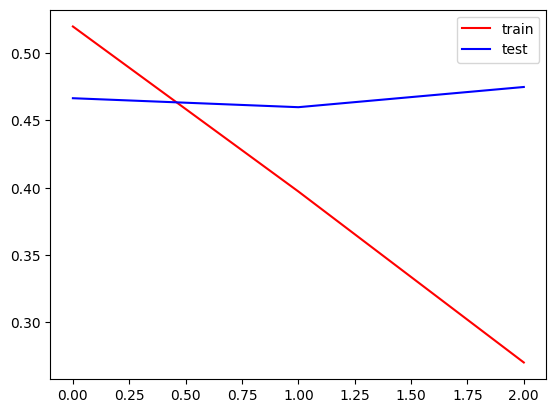

In [13]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="test")
plt.legend()
plt.show()

In [14]:
# user input predict
img_path='/content/dogs-vs-cats/train/cats/cat.0.jpg'
img=keras.utils.load_img(img_path, target_size=(256,256))

#convert to array
img_array=keras.utils.img_to_array(img)

# normalize
img_array=img_array/255.0

# expand dims to convert to batch shape
img_array=np.expand_dims(img_array, axis=0)

prob=model.predict(img_array)[0][0]
print(f"Probability: {prob}")

Pred_class=1 if prob>0.5 else 0
print(f"Predicted class: {Pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Probability: 0.5399907827377319
Predicted class: 1


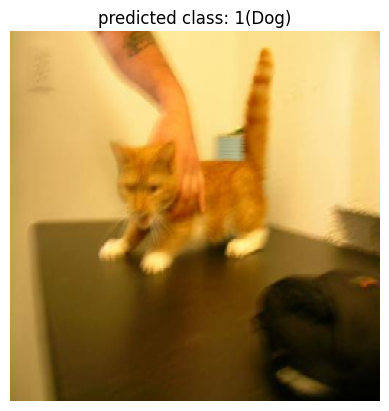

In [15]:
plt.imshow(img)
plt.axis('off')
plt.title(f'predicted class: {Pred_class}({"Dog" if Pred_class==1 else "Cat"})')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


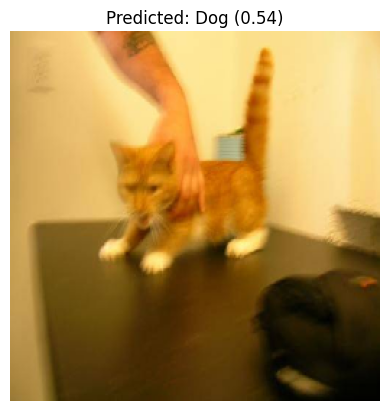

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


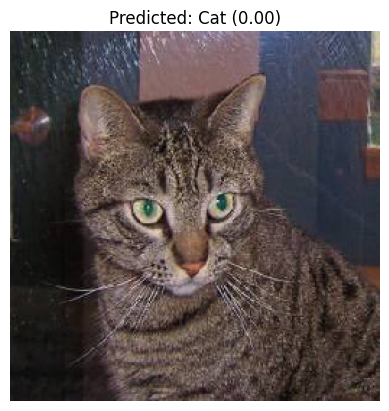

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


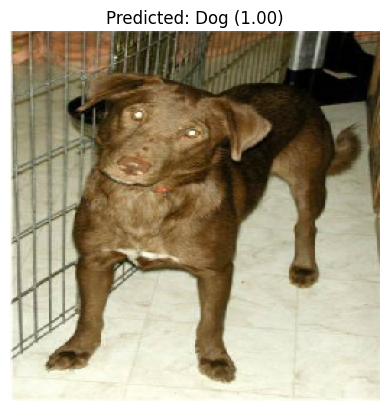

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


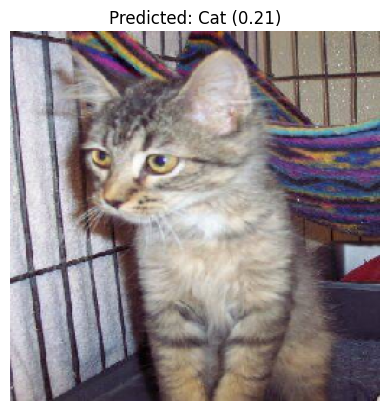

In [16]:
# List of 4 image paths (mix of cats and dogs from dataset)
img_paths = [
    '/content/dogs-vs-cats/train/cats/cat.0.jpg',
    '/content/dogs-vs-cats/train/cats/cat.1.jpg',
    '/content/dogs-vs-cats/train/dogs/dog.1.jpg',
    '/content/dogs-vs-cats/train/cats/cat.2.jpg'
]

# Loop through each image and predict
for path in img_paths:
    img = keras.utils.load_img(path, target_size=(256, 256))
    img_array = keras.utils.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Convert to batch format

    prob = model.predict(img_array)[0][0]
    Pred_class = 1 if prob > 0.5 else 0

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {'Dog' if Pred_class == 1 else 'Cat'} ({prob:.2f})")
    plt.show()


In [17]:
model.save("catvsdog.h5")

In [18]:
model.save('my_model.keras')